# Fraud Detecting Model

*Importing Liberaries*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Importing Daya Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# to ignore warning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

*Importing the Data File*

In [4]:
df= pd.read_csv('Fraud.csv')

# The Data

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


There are 1000 rows and 11 columns

# Exploratory Data Analysis

*Checking the missing values* 

In [9]:
# If heatmap is taking too much time to load, then run the below print code

<AxesSubplot:>

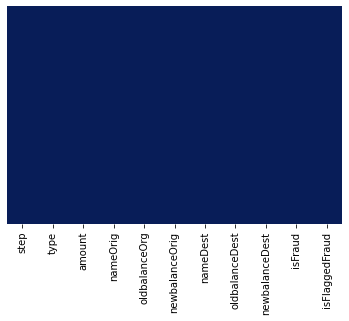

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu_r')

#print("Any missing data?",df.isnull().sum().any())

As we can see, there is all blue color and no other color disturbance is present. 
 So, there is no missing values in data

Text(0.5, 1.0, 'Correlation Matrix')

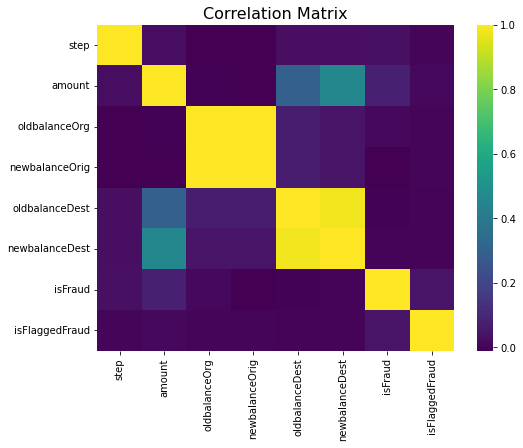

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis')
plt.title('Correlation Matrix', size=16)

*Finding the Total No. of Transaction of All Types*

Text(0.5, 0, 'Transaction Type')

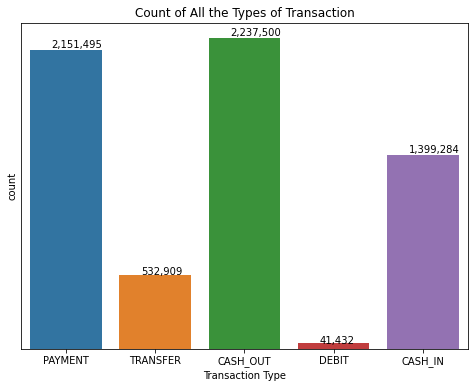

In [10]:
d= df.groupby('type').count()
plt.figure(figsize=(8,6))
ax= sns.countplot(x='type', data= df)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.title('Total No. of Transactions of all Types')
plt.yticks([])
plt.xlabel("Transaction Type")

*Finding Valid & Fraud Transaction*

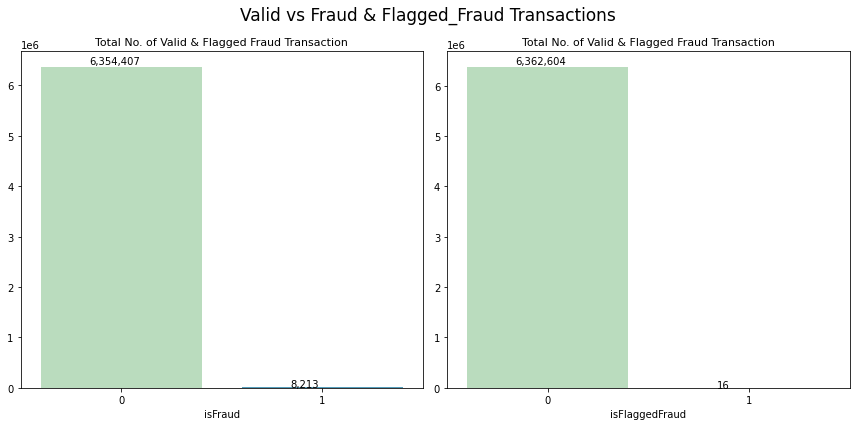

No of Valid transactions: 6354407 i.e 99.87 %
No of Fraud transactions: 8213 i.e 0.13 %


No of Valid transactions: 6362604 i.e 99.87 %
No of Flagged Fraud transactions: 16 i.e 99.87 % 



In [14]:
fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(12,6), sharex= True)
fig.suptitle("Valid vs Fraud & Flagged_Fraud Transactions", size=17)

d= df.groupby('isFraud').count()
axes[0].set_title("Total No. of Valid & Flagged Fraud Transaction",size=11)
a1= sns.countplot(data= df, x='isFraud', ax=axes[0], palette='GnBu')
for p in a1.patches:
    a1.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
axes[0].set_ylabel('')

d= df.groupby('isFlaggedFraud').count()
axes[1].set_title("Total No. of Valid & Flagged Fraud Transaction",size=11)
a2= sns.countplot(data= df, x='isFlaggedFraud', ax=axes[1], palette='GnBu')
for q in a2.patches:
    a2.annotate(str(format(int(q.get_height()), ',d')), (q.get_x()+0.24, q.get_height()*1.01))
axes[1].set_ylabel('')

plt.tight_layout()
plt.show() 

#print('\n')
print("No of Valid transactions:",df[df['isFraud']==0]['isFraud'].count(),'i.e',round(df[df['isFraud']==0]['isFraud'].count()/df.shape[0] * 100,2),'%')
print("No of Fraud transactions:",df[df['isFraud']==1]['isFraud'].count(),'i.e',round(df[df['isFraud']==1]['isFraud'].count()/df.shape[0] * 100,2),'%')

print('\n')
print("No of Valid transactions:",df[df['isFlaggedFraud']==0]['isFlaggedFraud'].count(),'i.e',round(df[df['isFraud']==0]['isFlaggedFraud'].count()/df.shape[0] * 100,2),"%")
print("No of Flagged Fraud transactions:",df[df['isFlaggedFraud']==1]['isFlaggedFraud'].count(),'i.e',round(df[df['isFraud']==0]['isFlaggedFraud'].count()/df.shape[0] * 100,2),"%","\n")

*Checking for any mistmatch in Balance at "Origin" or "Destination"*

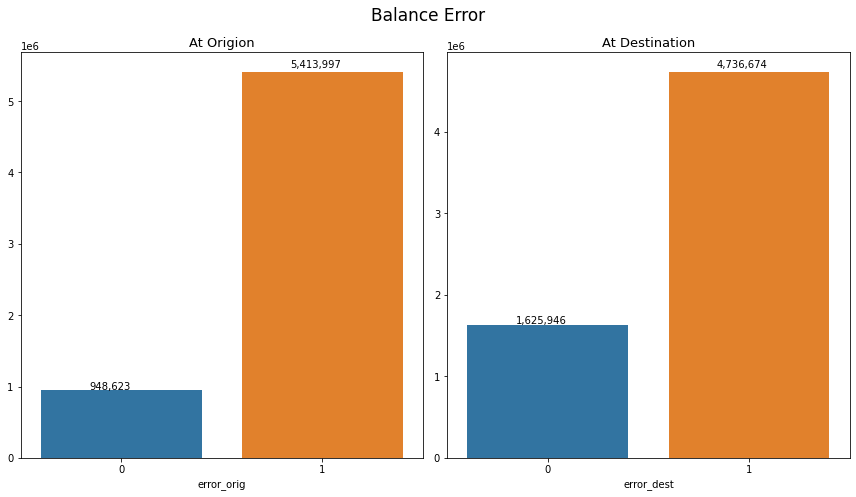



Balance Error at the Origin: 5413997 i.e. 85.09 %
Balance Error at the Destination: 4736674 i.e. 74.45 %


In [15]:
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

fig, axes= plt.subplots(nrows=1,ncols=2,figsize=(12,7), sharex= True)
fig.suptitle("Balance Error", size=17)

d= df.groupby('error_orig').count()
axes[0].set_title("At Origion",size=13)
a1= sns.countplot(data= df, x='error_orig', ax=axes[0])
for p in a1.patches:
    a1.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
axes[0].set_ylabel('')

d= df.groupby('error_dest').count()
axes[1].set_title("At Destination",size=13)
a2= sns.countplot(data= df, x='error_dest', ax=axes[1])
for q in a2.patches:
    a2.annotate(str(format(int(q.get_height()), ',d')), (q.get_x()+0.24, q.get_height()*1.01))
axes[1].set_ylabel('')

plt.tight_layout()
plt.show() 

print('\n')
print("Balance Error at the Origin:",df['error_orig'].value_counts()[1],"i.e.",round(df['error_orig'].value_counts()[1]/df.shape[0] * 100,2),"%")
print("Balance Error at the Destination:",df['error_dest'].value_counts()[1],"i.e.",round(df['error_dest'].value_counts()[1]/df.shape[0] * 100,2),"%")

In [16]:
print("Any transaction with amount less than or equal to 0?")
print(len(df[df.amount<=0]),'\n')
print("What type of transactions are they?")
print(df[df.amount<=0]['type'].value_counts().index[0],'\n')
print("Are all these marked as Fraud Transactions?")
df[df.amount<=0]['isFraud'].value_counts()[1] == len(df[df.amount<=0])

Any transaction with amount less than or equal to 0?
16 

What type of transactions are they?
CASH_OUT 

Are all these marked as Fraud Transactions?


True

All the fraud transactions belong to Transfer or Cash-out type, so discard data corresponding to other types

In [17]:
df= df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT']))]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1,1
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1,1


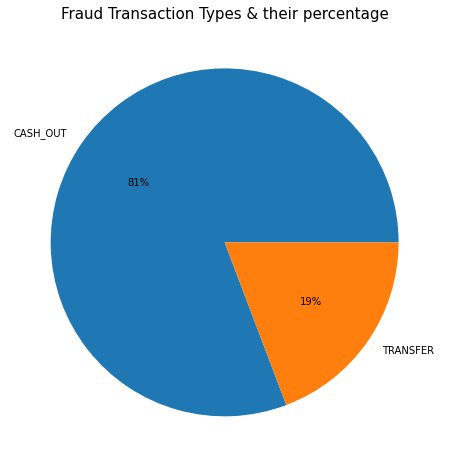

In [18]:
plt.figure(figsize=(10,8))
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Transaction Types & their percentage", size=15)
plt.show()

Text(0.5, 0, 'Transaction Type')

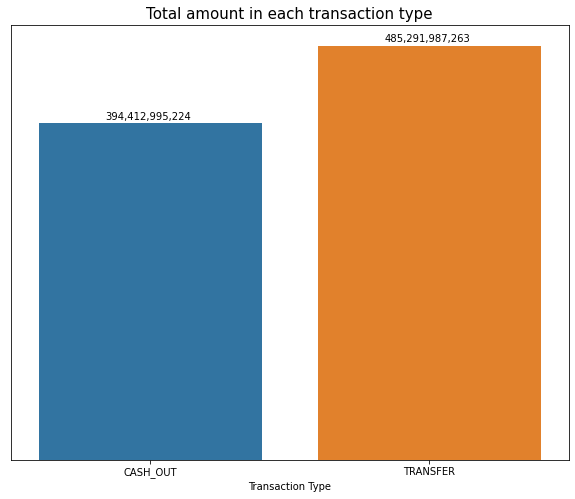

In [19]:
d = df.groupby('type')['amount'].sum()
plt.figure(figsize=(10,8))
ax = sns.barplot(x=d.index,y=d.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
    
plt.title("Total amount in each transaction type", size=15)
plt.yticks([])
plt.xlabel("Transaction Type")

(array([0, 1, 2, 3]),
 [Text(0, 0, '(CASH_OUT, 0)'),
  Text(1, 0, '(CASH_OUT, 1)'),
  Text(2, 0, '(TRANSFER, 0)'),
  Text(3, 0, '(TRANSFER, 1)')])

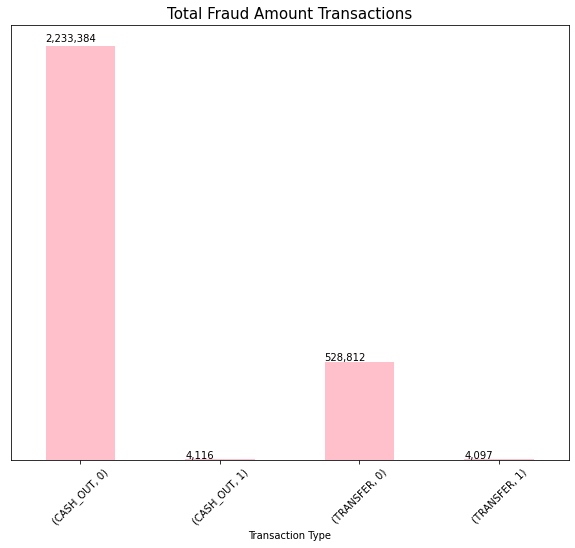

In [20]:
plt.figure(figsize=(10,8))
ax = df.groupby(['type','isFraud']).size().plot(kind='bar', color='pink')

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.title("Total Fraud Amount Transactions",size=15)
plt.xlabel("Transaction Type", size= 10)
plt.yticks([])
plt.xticks(rotation=45)

*Deleting the unwanted columns for Prediction*

In [21]:
df.drop(['step','type','nameOrig','nameDest','error_orig','error_dest','isFlaggedFraud'],axis=1,inplace=True)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,181.00,181.0,0.0,0.0,0.00,1
3,181.00,181.0,0.0,21182.0,0.00,1
15,229133.94,15325.0,0.0,5083.0,51513.44,0
19,215310.30,705.0,0.0,22425.0,0.00,0
24,311685.89,10835.0,0.0,6267.0,2719172.89,0


Here, I have dropped columns like 'step','type','nameOrig','nameDest','error_orig','error_dest','isFlaggedFraud' because according to me, focussing major on the before transaction balance, after transaction balance & amount sent would be a better choice for the Fraud detecting model.

*Importing the sklearn libraraies*

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score, classification_report
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

*Standardizing all the continuous values to be between 0 and 1*

In [23]:
ss = StandardScaler()

df.amount         = ss.fit_transform(df[['amount']])
df.oldbalanceOrg  = ss.fit_transform(df[['oldbalanceOrg']])
df.oldbalanceDest = ss.fit_transform(df[['oldbalanceDest']])
df.newbalanceOrig = ss.fit_transform(df[['newbalanceOrig']])
df.newbalanceDest = ss.fit_transform(df[['newbalanceDest']])

# Training & Testing Data

In [24]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

I am taking, X= (old_origin_balance, old_destination_balance, new_origin_balance, new_destination_balance) & y= (isFraud).   Because according to me these are the features which will be best for the Prediction model. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2077806, 5), (692603, 5), (2077806,), (692603,))

In [26]:
lg= LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [27]:
predictions = lg.predict(X_test)

*Plotting the Confusion Matrix*

In [28]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    
    plt.figure(figsize=(6,6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    

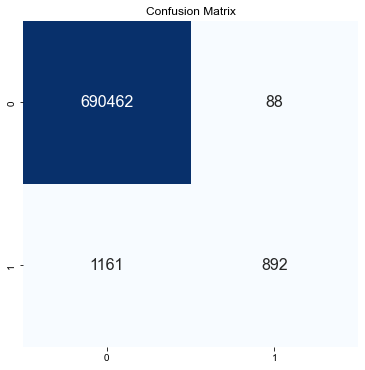

In [29]:
conf_matrix(y_test, predictions)

In [30]:
print("How many class does the model predict?\n",np.unique(predictions))
print("\n","Numbers in each class:","\n 0 :",len(predictions[predictions==0]))
print(" 1 :",len(predictions[predictions==1]))

How many class does the model predict?
 [0 1]

 Numbers in each class: 
 0 : 691623
 1 : 980


In [31]:
f1score = f1_score(y_test, predictions)
print('f1 score:', f1score,'\n')

acc_lg= accuracy_score(y_test, predictions)
print("Accuracy of this model:", acc_lg)
print("Accuracy in %:", round(acc_lg*100, ndigits=2),"%")

f1 score: 0.5881965051104517 

Accuracy of this model: 0.9981966581143887
Accuracy in %: 99.82 %


As my model has acquired an Accuracy of 99.82% , I can say that the variables which I have choosen above for my model are the right choice.
It makes sense to me that in order to find the fraud in transaction the key features should be Balance the Total Amount being Sent and Balance of Sender & Reciever before and after the transaction as the transaction fraud can most likely happen between these stages. 

Now, As for Prevention, company should have custom model for checking any mistmatch in Balance of Sender or Reciever while any mode of transaction is taking place. Because then, Then & there will be error can get detected & further measures can be taken.

Now, for Checking whether this model work or not we can always do weekly or monthly check-up with this Fraud Detecting Model to see if the there is any discrepencies happening with that process. 

**-/Done/-**